In [1]:
import numpy as np
import sys
sys.path.append('vysxd')
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from scipy.special import erf
from dispersion_solver_define import *

%matplotlib inline

## Let us endeavor to plot the dispersion relation of the electron plasma wave and the effects of Landau damping

Let's look in the range where $\omega/\omega_p \in (0,2)$. I think that I am abusing mathematical notation here for sure.

This isn't working and I am not going to lose my mind over it.

[array([1.04313725]), array([1.07058824]), array([1.13137255]), array([1.19607843]), array([1.26666667]), array([1.32352941]), array([1.40980392])]
[array([-0.00039216]), array([-0.00039216]), array([-0.00666667]), array([-0.02392157]), array([-0.05529412]), array([-0.08823529]), array([-0.14784314])]


<Figure size 1800x1200 with 0 Axes>

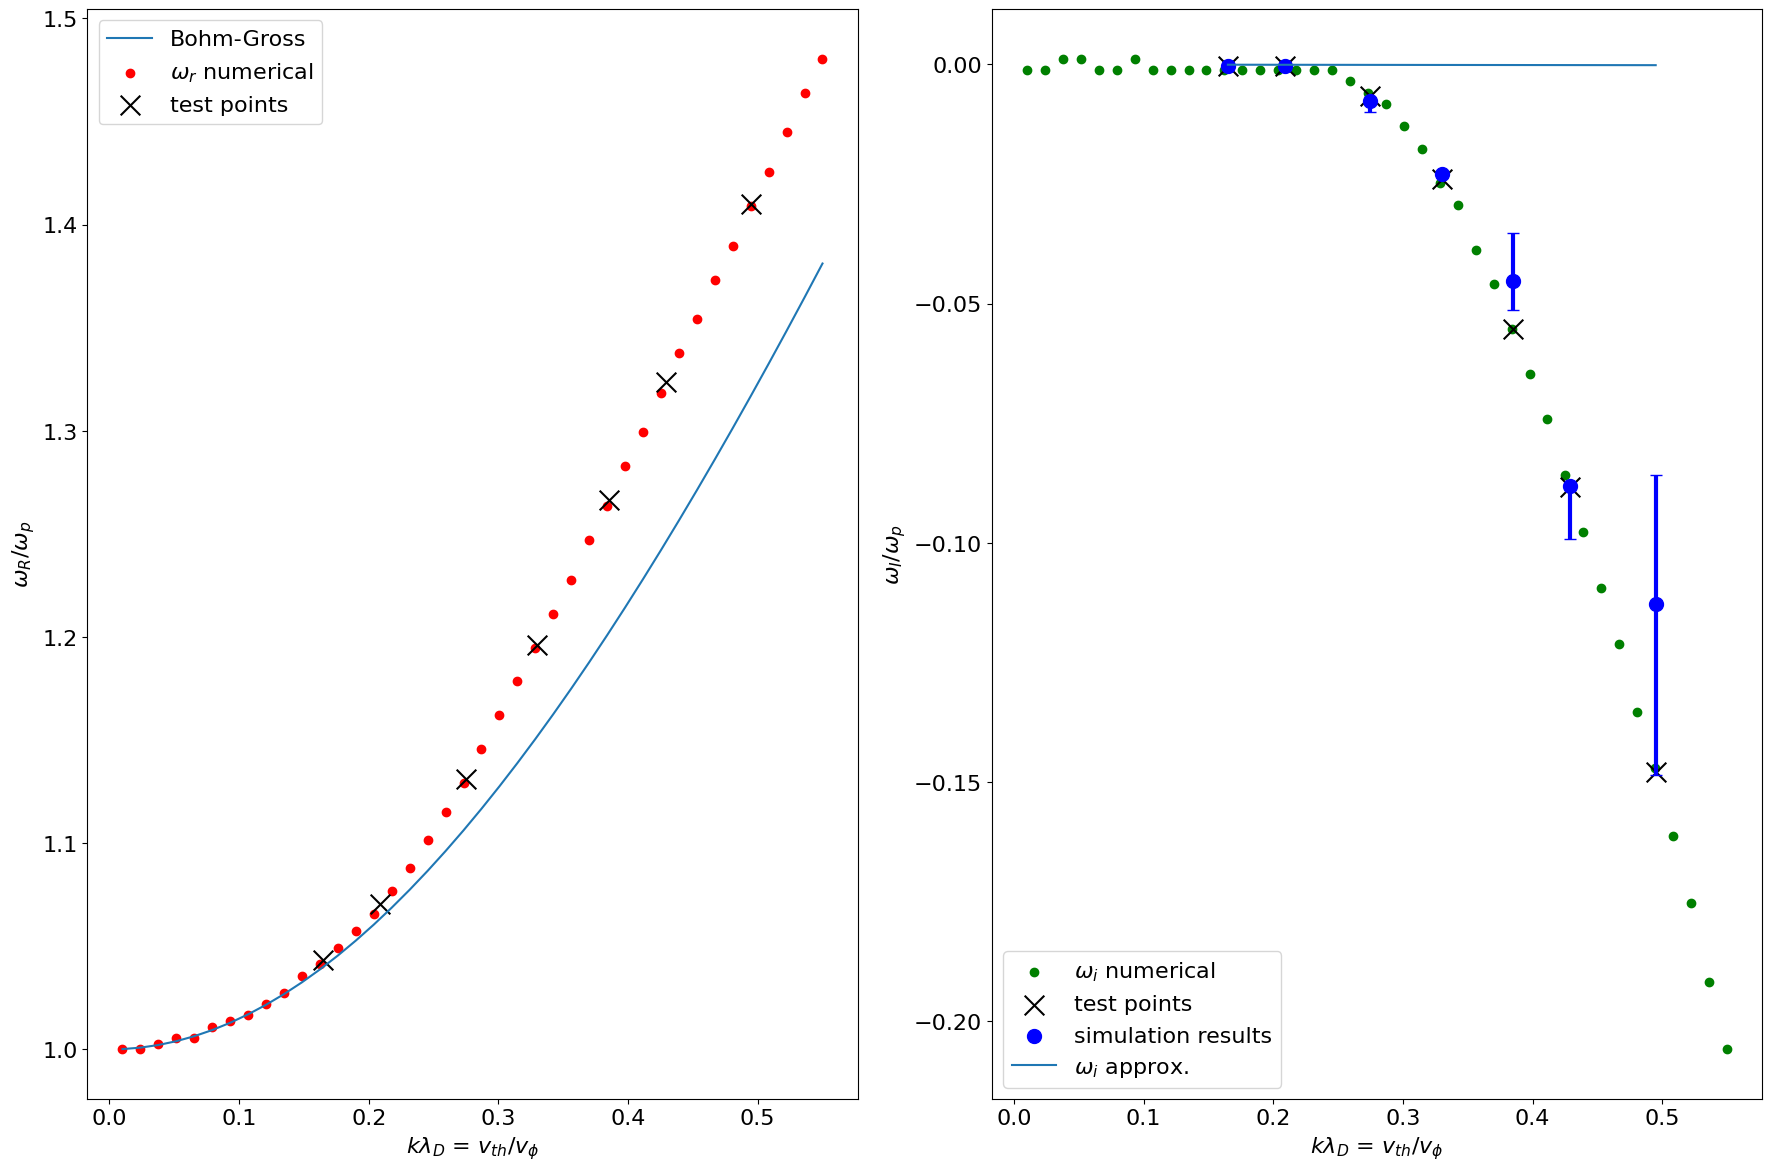

In [8]:
def bohm_gross(lambda_k):
    return np.sqrt(1 + 3*lambda_k**2)

plt.rcParams.update({'font.size': 16})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.01, .55, 40)

Ti_over_Te = .0025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

ax1.plot(k0s,bohm_gross(k0s), label = 'Bohm-Gross')

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [1.,1.7],Wi_range=[0.3,-0.3])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=2)

k0s = np.array([3, 3.8, 5, 6, 7, 7.8, 9])*0.055

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [1,1.5],Wi_range=[0.1,-0.3])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'black', label = 'test points', marker = 'x', s = 200)
ax2.scatter(k0s, wi_vals, c = 'black', label = 'test points', marker = 'x', s = 200)

experimental_wis = np.array([-0.00039216,-0.00039216, -0.0075667,-0.02292157,-0.04529412,-0.08813529,-0.11284314])
wi_vals_upper_limit = np.array([-0.00039216,-0.00039216, -0.0075667,-0.02292157,-0.03529412,-0.08813529,-0.08584314])
wi_vals_lower_limit = np.array([-0.00039216,-0.00039216, -0.0099667,-0.02302157,-0.05129412,-0.09913529,-0.1484314]) 

error = np.array([np.abs(experimental_wis-wi_vals_lower_limit),np.abs(experimental_wis-wi_vals_upper_limit)])#, np.abs(experimental_wis-wi_vals_upper_limit))
ax2.scatter(k0s,experimental_wis,c = 'blue',label = 'simulation results', marker = 'o', s = 100)
ax2.errorbar(k0s, experimental_wis, yerr=error, xerr=None, linestyle = 'None',elinewidth=3,c ='blue',capsize=4)

# ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
# ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

# ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()

print(wr_vals)
print(wi_vals)
plt.savefig('EPW_dispersion_relation') #Uncomment if you want to save the fig


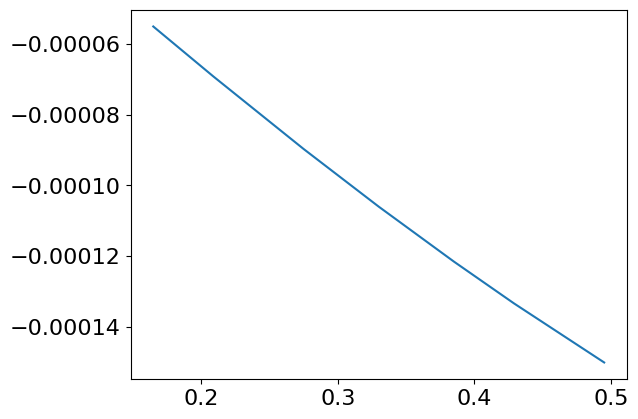

In [12]:
wi_approx = -np.sqrt(np.pi/8)*np.sqrt(1/1836.)+ (Ti_over_Te)**(3/2)*np.exp(-Ti_over_Te/(2))
plt.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')


In [36]:
print(k0s)

[0.165 0.209 0.275 0.33  0.385 0.429 0.495]


We need to know what to plug in to the simulation in order to verify this dispersion relation. Find $\omega_r$ and $\omega_i$ for integer values of k times $v_{th} = 0.055$ 

[array([1.04313725]), array([1.07843137]), array([1.13137255]), array([1.19607843]), array([1.26666667]), array([1.3372549]), array([1.40980392])]


<Figure size 1800x1200 with 0 Axes>

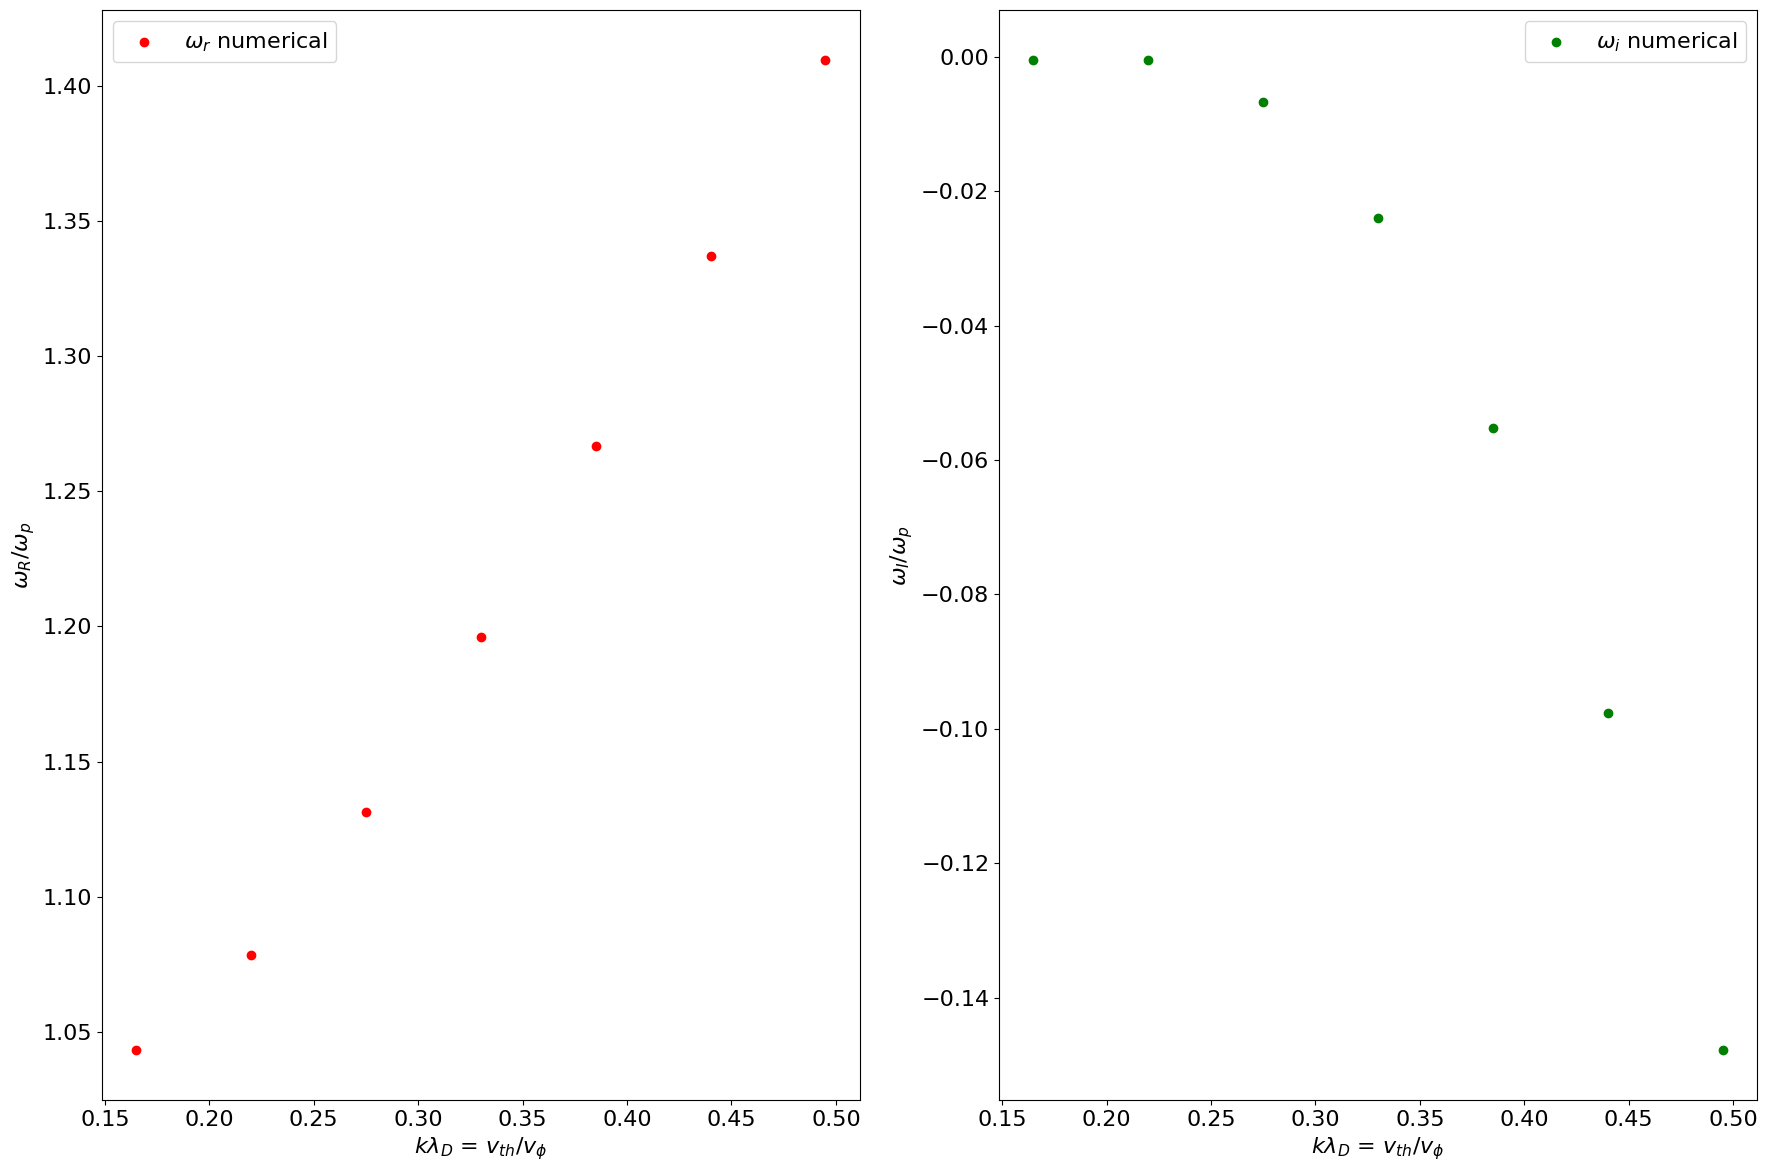

In [6]:
plt.rcParams.update({'font.size': 16})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(3, 9, 7)*0.055

Ti_over_Te = .0025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [1,1.5],Wi_range=[0.1,-0.3])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=2)

print(wr_vals)

ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()

# plt.savefig('EPW dispersion relations') #Uncomment if you want to save the fig


In [7]:
# 
k0s = np.array([3.8,4.2,7.8,8.2])*0.055

Ti_over_Te = .0025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [1,1.5],Wi_range=[0.1,-0.3])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)

print(wr_vals)


[array([1.07058824]), array([1.08823529]), array([1.32352941]), array([1.35098039])]


## Let us endeavor to plot the dispersion relation for the Ion acoustic wave. 
In order to do this, we would need to look in the range of very small $\omega$

Through trial and error, we found this to be around $\omega/\omega_p \in (10^{-3}, 10^{-2})$

<Figure size 1800x1200 with 0 Axes>

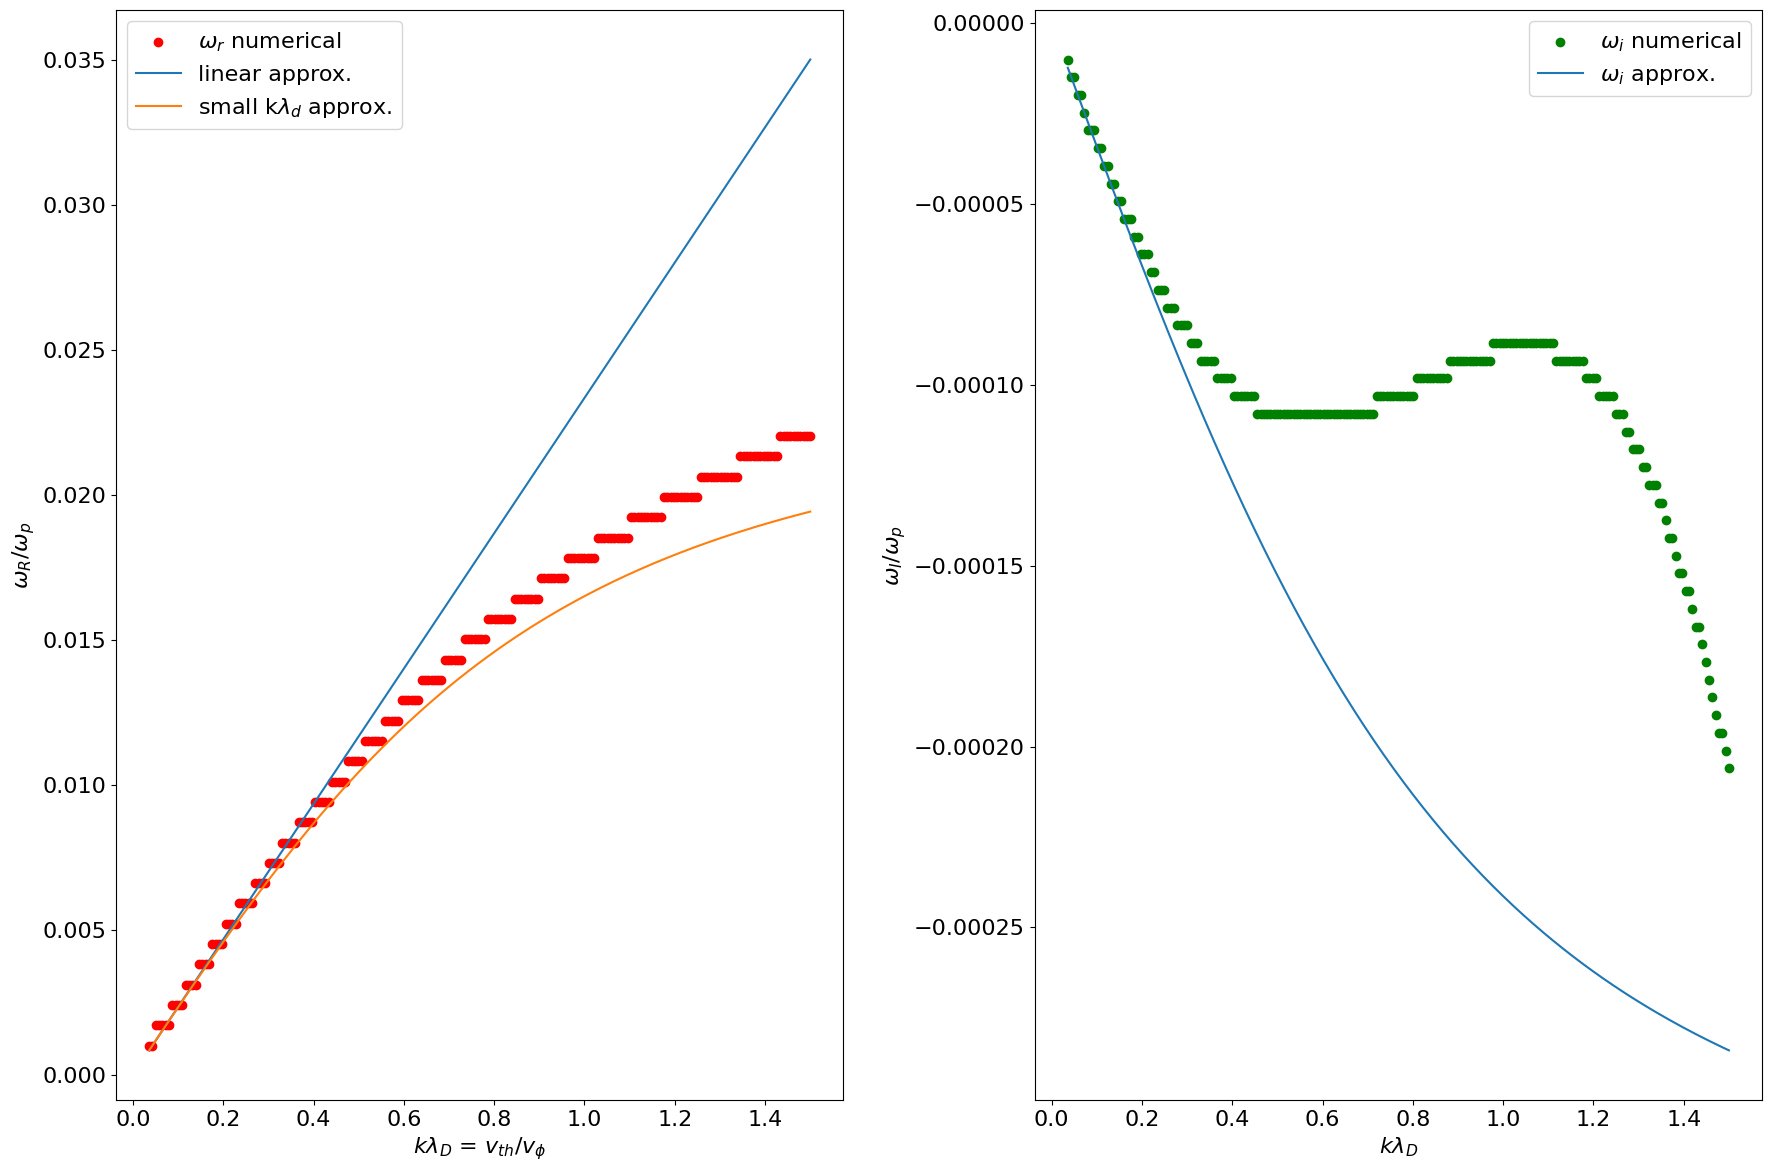

In [2]:
plt.rcParams.update({'font.size': 16})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.036, 1.5, 200)

Ti_over_Te = .025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.001,0.09],Wi_range=[-0.00001,-0.0005])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=2)

#ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()
#ax1.title('IAW $\omega_r$ dispersion')
#ax2.title('IAW $\omega_i$ dispersion')
plt.savefig('IAW dispersion relations')


This looks... ok.

The IAW dispersion relation from fluid theory is: $\omega^2/k^2 = T_e/m_i$

If we normalize these units we get: $\frac{\omega^2}{\omega_p^2} \frac{1}{k^2 \lambda_d^2} = \frac{\omega'^2}{k'^2}= \frac{T_e}{m_i \omega_p^2 \lambda_d^2}$

$\frac{\omega'^2}{k'^2} = \frac{m_e}{m_i} \frac{1}{k_B}$

See above for graph

Maybe we can try making an animation of increasing T_ratio for the presentation?